# ***Decoding Movie Reviews: A Sentiment Analysis Approach***


---


### An End-to-End Machine Learning Pipeline for Classifying Positive and Negative Movie Reviews using Naive Bayes technique




####  By:
####      **YASH PALIWAL**


##  **Project Overview**

This project is focused on **Sentiment Analysis** — a popular application of Natural Language Processing (NLP) where the goal is to determine the sentiment (positive or negative) of a given piece of text.

We’ll be working with the **NLTK Movie Reviews dataset**, applying various preprocessing techniques and building a Machine Learning pipeline to classify text reviews using models like **Naive Bayes**, **Logistic Regression**, and others.

This notebook includes:

- **Text preprocessing** (**cleaning**,** tokenization**, **lemmatization**)
- Feature extraction using **TF-IDF Vectorization**
- **Model training** & **evaluation**
- Visualizations: **ROC Curve**, **Confusion Matrix**, **WordClouds**
- **Model comparison** & **insights**

---


##  **I. Importing Required Libraries**




We'll start by importing all the necessary Python libraries for text preprocessing, data handling, machine learning, and visualization.

In [ ]:

import nltk
from nltk.corpus import movie_reviews
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')

from sklearn.metrics import RocCurveDisplay

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##**II. Dataset: NLTK Movie Reviews**

We'll use the built-in `movie_reviews` corpus from the NLTK library. It contains:

- **2,000 labeled movie reviews**
  - 1,000 Positive
  - 1,000 Negative
- Each review is already tokenized into words.
- We'll convert this into a pandas DataFrame for easier manipulation and processing.

---


In [ ]:

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## **III. Setup: Stopwords, Lemmatizer & Helper Functions**

To prepare our text for analysis, we’ll use a few core NLP tools:

- **Stopwords:** These are common words (like "the", "is", "in") that don't carry much meaning. We'll remove them to reduce noise in the data.
- **Lemmatizer:** Converts words to their base form using WordNet (e.g., "playing" → "play"). This helps treat similar words as one.
- **Part-of-Speech (POS) Tagging:** Used to improve lemmatization accuracy by understanding the grammatical role of each word (noun, verb, adjective, etc.).

We’ll define a helper function `get_wordnet_pos()` to map NLTK’s POS tags to WordNet-compatible tags for smarter lemmatization.

---


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


## **IV. Text Preprocessing**

Real-world text data is messy — so before feeding it into our models, we clean it using several NLP techniques:

- Convert to lowercase
- Remove punctuation, special characters, and numbers
- Tokenize the text into words
- Remove stopwords (common words like "the", "is", etc.)
- **Lemmatization**: Reduce words to their base/root form (e.g., "running" → "run")
- Use **POS tagging** (Part-of-Speech) to improve lemmatization quality

The cleaned text is then used to train and evaluate our models.

---


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special chars/numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word))
              for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

## **V. Preparing the Dataset**

We’ll now load the movie reviews from NLTK, which come as a list of word tokens for each review along with their corresponding sentiment label (`pos` or `neg`).

To make the data easier to work with, we will:
- Combine the word tokens back into full text reviews.
- Convert the dataset into a **pandas DataFrame**.
- Apply our custom **text cleaning function** to preprocess each review.

---


In [ ]:
print("Preparing dataset...")
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


Preparing dataset...


In [ ]:
  import nltk
  nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
 import nltk
 nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:

             df = pd.DataFrame(documents, columns=['text', 'sentiment'])
df['text'] = df['text'].apply(lambda x: clean_text(' '.join(x)))
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})  # 1 = positive, 0 = negative

## **VI. Dataset Preview & Splitting**

Let’s take a quick look at our preprocessed dataset and check the class distribution:

- `text`: Cleaned review content
- `sentiment`: 1 = Positive, 0 = Negative

After verifying the dataset, we split it into **training (80%)** and **testing (20%)** sets using `train_test_split`. This helps us evaluate the model’s performance on unseen data.

We now move on to building our traditional machine learning model.

---


In [ ]:
print("\nDataset sample:")
print(df.head())
print(f"\nClass distribution:\n{df['sentiment'].value_counts()}")


Dataset sample:
                                                text  sentiment
0  plot two teen couple church party drink drive ...          0
1  happy bastard quick movie review damn bug get ...          0
2  movie like make jade movie viewer thankful inv...          0
3  quest camelot warner bros first feature length...          0
4  synopsis mentally unstable man undergo psychot...          0

Class distribution:
sentiment
0    1000
1    1000
Name: count, dtype: int64


In [ ]:
print("\n" + "="*50)
print("Traditional ML Approach")
print("="*50)
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=42
)



Traditional ML Approach


## **VII. Feature Extraction using TF-IDF**

To convert text into numerical features that machine learning models can understand, we use **TF-IDF (Term Frequency–Inverse Document Frequency)** vectorization.

TF-IDF highlights important words by giving higher weights to terms that appear frequently in a document but are rare across all documents.

Key settings used:
- `ngram_range=(1, 2)` – Use unigrams and bigrams
- `max_features=5000` – Limit the feature size for efficiency
- `min_df=5`, `max_df=0.8` – Ignore very rare or overly common words
- `stop_words='english'` – Remove built-in English stopwords
- `sublinear_tf=True` – Apply sublinear term frequency scaling

This step transforms the cleaned text into a numerical matrix, ready for model training.

---


In [ ]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),          # Use unigrams and bigrams
    stop_words='english',        # Removes common stopwords
    min_df=5,                    # Ignore terms with <5 docs
    max_df=0.8,                  # Ignore terms in >80% of docs
    sublinear_tf=True            # Use sublinear tf scaling
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## **VIII. Model Training: Naive Bayes Classifier**

We use the **Multinomial Naive Bayes** algorithm — a commonly used and effective model for text classification tasks.

Naive Bayes works well for high-dimensional data like text and assumes that the presence of one feature (word) is independent of others, which makes it fast and efficient.

Steps:
- Fit the model on the TF-IDF-transformed training data
- Predict sentiments on the test set

We'll evaluate the performance using common classification metrics.

---


In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)

## **IX. Model Evaluation & Results**

After training, we evaluate our Naive Bayes model using several performance metrics:

- **Accuracy** – Overall correctness of the model
- **Precision** – Correct positive predictions out of total predicted positives
- **Recall** – Correct positive predictions out of total actual positives
- **F1-Score** – Harmonic mean of precision and recall

We'll also visualize:
- 🔹 The **Confusion Matrix** to see how well the model distinguishes between classes
- 🔹 The **ROC Curve** to evaluate performance across different thresholds

This helps us understand how reliable our sentiment predictions are.

---


In [ ]:
print("\nModel Results:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Model Results:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       199
           1       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Accuracy: 0.8275


## **X. Model Accuracy Comparison**

To visually understand our model’s performance, we plot a simple **accuracy comparison chart**.

Since we’re currently focusing on the Naive Bayes classifier, we display its accuracy as a benchmark. Later, you can extend this to include other models like Logistic Regression, SVM, or Random Forest for comparison.

This helps us quickly assess which model performs best for sentiment classification on this dataset.

---


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
model_scores = {}
model_preds = {}
print("\nComparing Different Models:\n")

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    model_scores[name] = acc
    model_preds[name] = preds
    print(f"{name}: Accuracy = {acc:.4f}")


Comparing Different Models:

Naive Bayes: Accuracy = 0.8275
Logistic Regression: Accuracy = 0.8350
Linear SVM: Accuracy = 0.8475
Random Forest: Accuracy = 0.7900


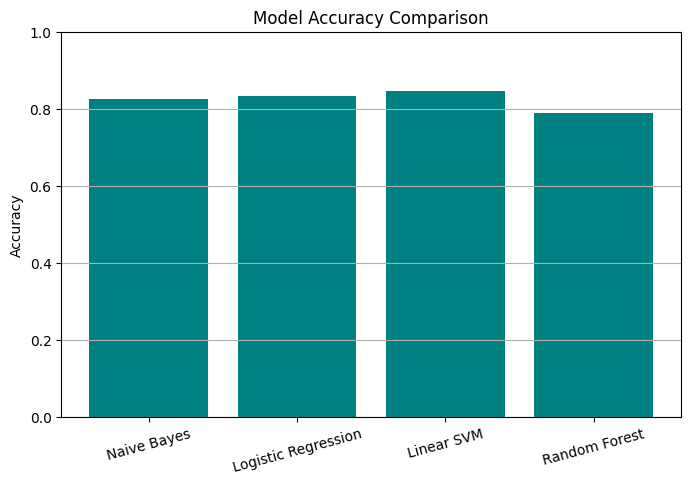

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(model_scores.keys(), model_scores.values(), color='teal')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()
from wordcloud import WordCloud

## **XI. Generating & Plotting WordClouds**

WordClouds help us visually represent the most frequent words in our dataset. The size of each word is proportional to its frequency in the text corpus.

We’ll generate two separate WordClouds:
1. **Positive Reviews** – Words that appear frequently in positive reviews.
2. **Negative Reviews** – Words that appear frequently in negative reviews.

These visualizations will give us an insight into the key themes or terms associated with positive and negative sentiments.

---

###  **Plotting WordClouds**

Here, we’ll plot the generated WordClouds to get a sense of which words dominate each sentiment class. By analyzing these visualizations, we can observe how certain words, such as “good”, “great”, or “bad”, “boring”, might relate to the overall sentiment of the review.


In [ ]:
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])


In [ ]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)


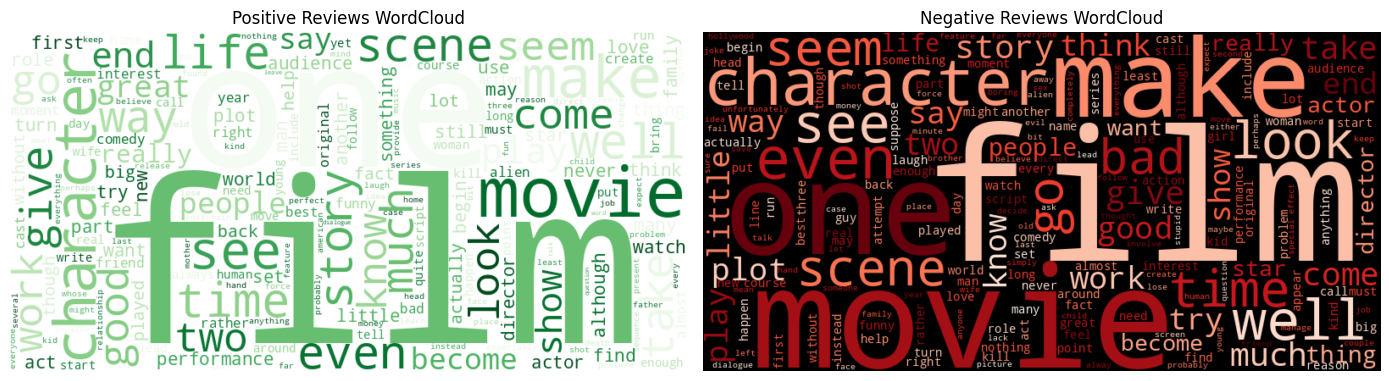

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')

plt.tight_layout()
plt.show()


## **XII. Confusion Matrix Visualization**

The **Confusion Matrix** is a powerful tool to evaluate how well our model is distinguishing between the different classes (Positive and Negative).

- **True Positives (TP)**: Correctly predicted positive reviews.
- **True Negatives (TN)**: Correctly predicted negative reviews.
- **False Positives (FP)**: Negative reviews incorrectly classified as positive.
- **False Negatives (FN)**: Positive reviews incorrectly classified as negative.

We'll visualize this matrix using a **Heatmap** to make it easier to interpret and identify where the model is making errors.

---

###  **ROC Curve & AUC**

The **ROC Curve** (Receiver Operating Characteristic) is another evaluation tool. It plots the **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)** across different classification thresholds.

We also calculate the **Area Under the Curve (AUC)** to summarize the model’s ability to distinguish between the positive and negative classes.

A higher AUC indicates better model performance.


In [ ]:
cm = confusion_matrix(y_test, y_pred)


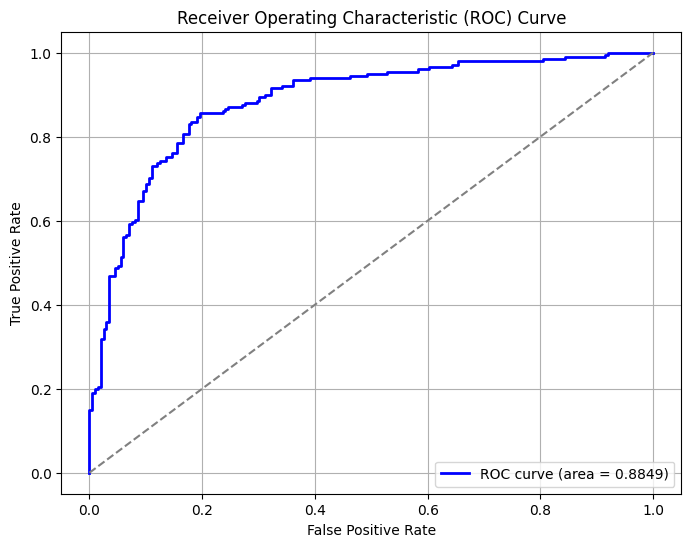

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test_tfidf)[:, 1])
roc_auc = roc_auc_score(y_test, nb.predict_proba(X_test_tfidf)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

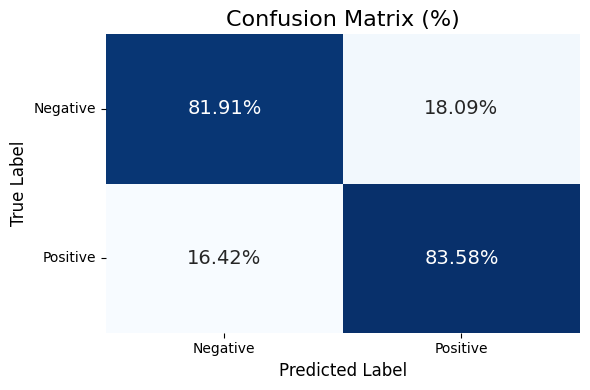

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix (%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

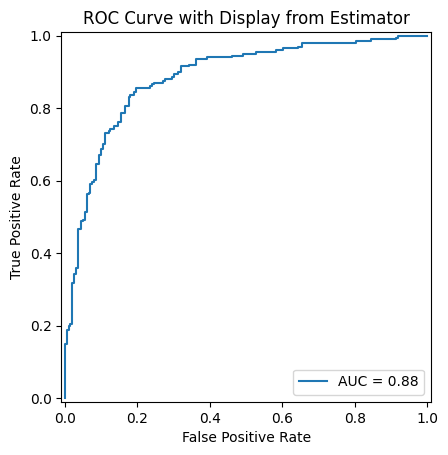

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Get the predicted probabilities for the positive class
y_prob = nb.predict_proba(X_test_tfidf)[:, 1]

# Plot the ROC curve with predicted probabilities
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve with Display from Estimator")
plt.show()



## **XIII. Accuracy Comparison: Naive Bayes**

Here, we visualize the **accuracy** of our Naive Bayes model in a bar chart. This gives a quick, intuitive comparison of model performance and allows for future extensions if you decide to add other models.

It will display the accuracy score as a bar, showing how well the Naive Bayes model classifies sentiment compared to other potential models.

---


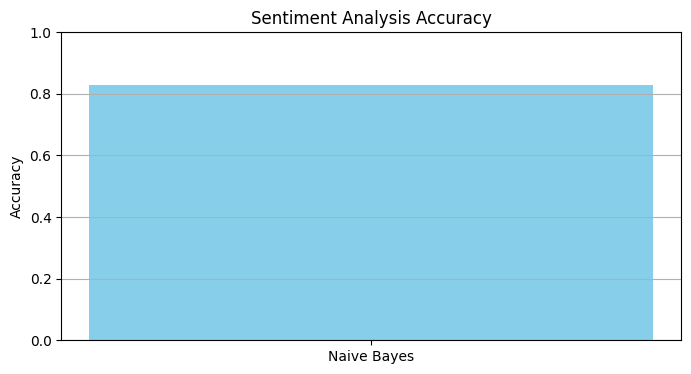

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(['Naive Bayes'], [accuracy_score(y_test, y_pred)], color='skyblue')
plt.title('Sentiment Analysis Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [ ]:
### TESTING
test_review = ["The movie is overall good ."]
cleaned_input = [clean_text(test_review[0])]  #
vector_input = vectorizer.transform(cleaned_input)
prediction = nb.predict(vector_input)[0]

sentiment = "Positive" if prediction == 1 else "Negative"
print(f"\nReview: {test_review[0]}")
print(f"Predicted Sentiment: {sentiment}")



Review: The movie is overall good .
Predicted Sentiment: Positive


## // **Conclusion & Next Steps** //

In this project, we built a **Sentiment Analysis** model using the **Naive Bayes** classifier to classify movie reviews as positive or negative. We leveraged the **NLTK Movie Reviews dataset** and applied various preprocessing techniques to clean the text data.

### -> **Key Highlights**:
- **Text Preprocessing**: We cleaned the data by removing stopwords, performing tokenization, and using lemmatization to standardize words.
- **Modeling**: The **Naive Bayes** classifier delivered strong results in sentiment prediction.
- **Evaluation**: We assessed the model with key metrics like accuracy, precision, recall, and ROC curves, providing deep insights into its performance.
- **Visual Insights**: WordClouds and confusion matrices helped us better understand the most common words in positive and negative reviews, as well as the model's classification behavior.

### -> **Moving Forward:**
- **Model Exploration**: Next, we can experiment with other models like **Logistic Regression** or **SVM** to improve performance.
- **Hyperparameter Tuning**: Fine-tuning the model and vectorizer settings could further boost accuracy.
- **Deployment**: The next step could be to deploy this model as an interactive web app, where users can input their own reviews and get instant sentiment predictions.

This project demonstrates how text mining and machine learning can be used to extract insights and build powerful models for sentiment analysis.

---

#END.

---
